In [1]:
%matplotlib inline
import os
import sys
import shapely
import pysal as ps
import numpy as np
import pandas as pd
import geopandas as gp
import seaborn as sns
from pandas import DataFrame
from geopandas.tools import sjoin
import statsmodels.api as sm
import matplotlib.pylab as plt
from fiona.crs import from_epsg
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import urllib
from geopandas import GeoDataFrame

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


**Curl file, unzip and move to PUIDATA**

In [3]:
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyct2010_16d.zip")
os.system("unzip " + "nyct2010_16d.zip")
os.system("rm " + "nyct2010_16d.zip")
os.system("mv " + "nyct2010_16d " + os.getenv("PUIDATA"))

0

**Put shapefile into Geopandas Dataframe**

In [5]:
cent_shape = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + "nyct2010_16d" + "/" + "nyct2010.shp")
cent_shape.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948473,"POLYGON ((967656.8290405273 155637.1314086914,..."
2,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((994133.507019043 214848.8975830078, ..."
3,1010000,1,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,"POLYGON ((993108.3057861328 216013.1307983398,..."
4,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((992216.5391845703 216507.6870117188,..."


**Drop rows from geodataframe where BoroName /= 'Brooklyn'**

In [6]:
cent_shape_bk = cent_shape.loc[cent_shape['BoroName'] == 'Brooklyn']
cent_shape_bk = cent_shape_bk.to_crs(epsg=4326)
cent_shape_bk.head(100)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
27,3000501,3,Brooklyn,I,000501,5.01,BK09,Brooklyn Heights-Cobble Hill,4004,9.015070e+05,4828.169912,POLYGON ((-73.99301822153384 40.69746236460012...
28,3002000,3,Brooklyn,I,002000,20,BK32,Sunset Park West,4012,1.620770e+06,5426.067279,POLYGON ((-74.01266264860632 40.64925555481489...
29,3004100,3,Brooklyn,I,004100,41,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,1.744094e+06,5283.856660,"POLYGON ((-73.9818167744823 40.68732980279828,..."
30,3005201,3,Brooklyn,E,005201,52.01,BK31,Bay Ridge,4013,1.448244e+06,5520.047898,"POLYGON ((-74.03460061535851 40.6220007390815,..."
31,3005202,3,Brooklyn,I,005202,52.02,BK31,Bay Ridge,4013,1.398134e+06,5190.713908,POLYGON ((-74.03543728497806 40.61995580767562...
32,3005800,3,Brooklyn,E,005800,58,BK31,Bay Ridge,4013,2.080303e+06,6098.167799,"POLYGON ((-74.0295640840969 40.61983253938534,..."
33,3006000,3,Brooklyn,I,006000,60,BK31,Bay Ridge,4013,1.639074e+06,5498.334387,"POLYGON ((-74.02835031608429 40.6227986269585,..."
34,3006500,3,Brooklyn,I,006500,65,BK33,Carroll Gardens-Columbia Street-Red Hook,4005,2.685634e+06,7861.136622,"POLYGON ((-73.99620846265908 40.6817234251053,..."
35,3006700,3,Brooklyn,I,006700,67,BK33,Carroll Gardens-Columbia Street-Red Hook,4005,1.680804e+06,5236.047804,POLYGON ((-73.99440802432692 40.68545249602955...
36,3006900,3,Brooklyn,I,006900,69,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,4004,1.927678e+06,5563.971321,POLYGON ((-73.98828896785815 40.68586869558069...


**Create geodataframe for CUSP coordinates, then convert to polygon by intersection spatially with Brooklyn Census Tract**

In [7]:
cusp = [['CUSP', 40.693217, -73.986403]]
cusp = pd.DataFrame(cusp, columns=['Name', 'Latitude', 'Longitude'])
cusp['LongLat'] = zip(cusp.Longitude, cusp.Latitude)
cusp['geometry'] = cusp[['LongLat']].applymap(lambda x: shapely.geometry.Point(x))
cusp = gp.GeoDataFrame(cusp, geometry='geometry')
cusp.crs = {'init': 'epsg:4326'}

In [8]:
cusp = gp.GeoDataFrame(cusp)
cusp

,Name,Latitude,Longitude,LongLat,geometry
0,CUSP,40.693217,-73.986403,"(-73.986403, 40.693217)",POINT (-73.986403 40.693217)


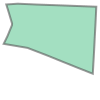

In [9]:
cusp_point = cent_shape_bk[cent_shape_bk.geometry.intersects(cusp.iloc[0].geometry)].geometry.values[0]
cusp_point 

**Plot census tracts with CUSP tract highlighted**

AttributeError: 'Polygon' object has no attribute 'plot'

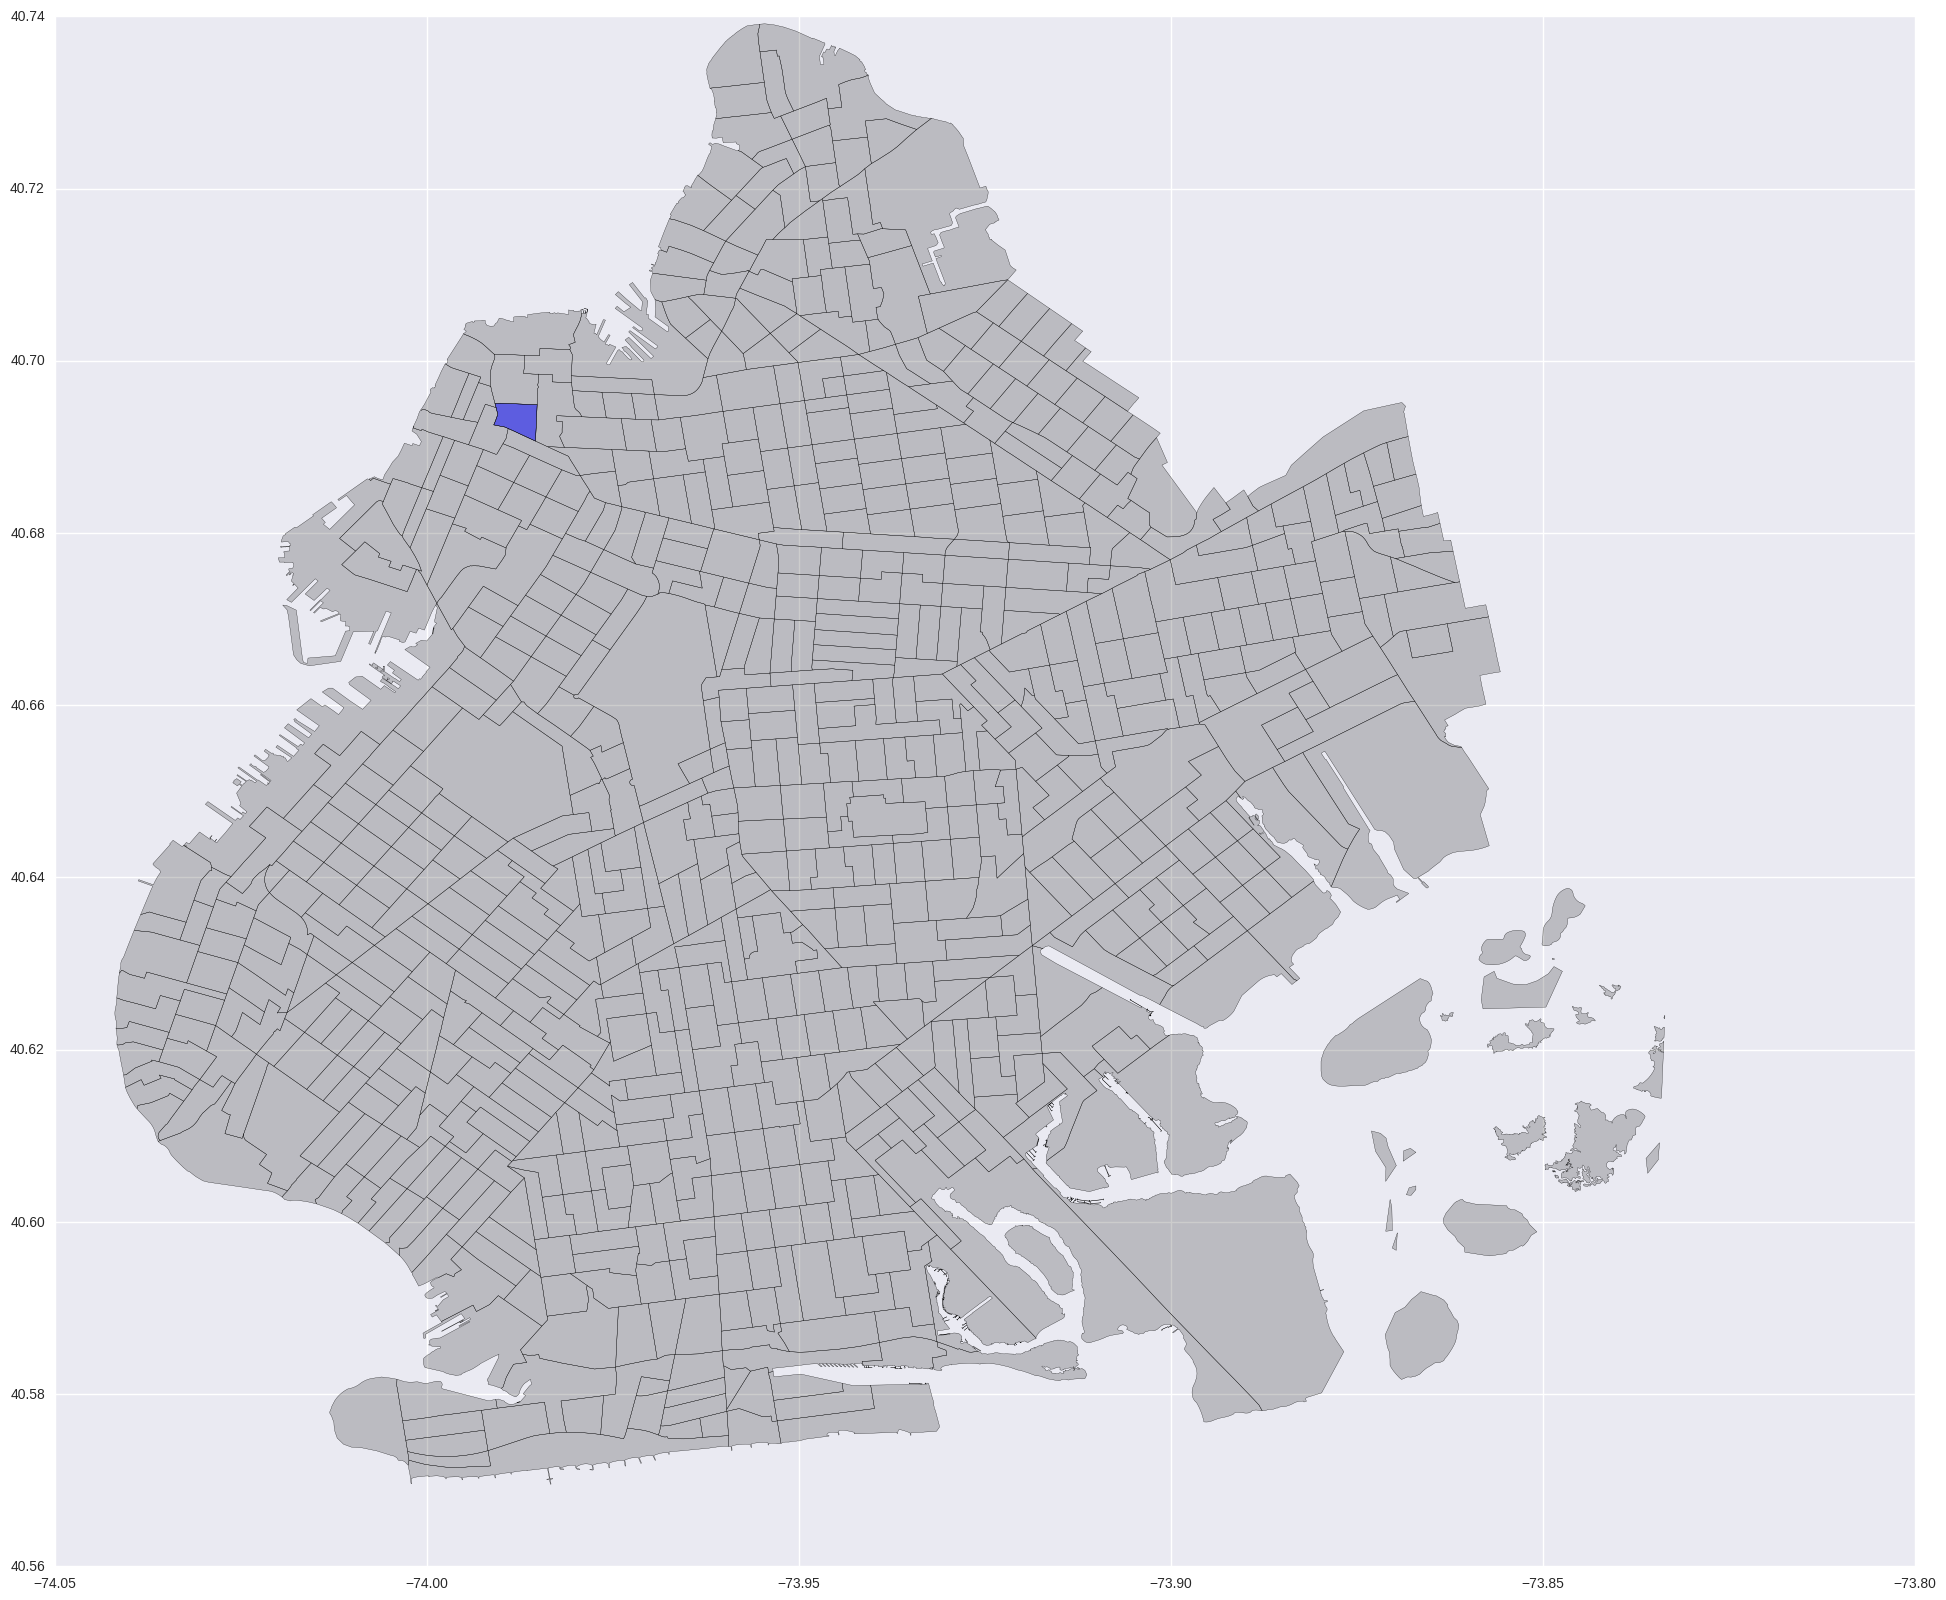

In [24]:
'''
Error message occurred despite the fact that the census tract of interest was 
displayed as the blue polygon on the plot, please disregard as the target of the
assignment has been fulfilled.
'''
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(24, 20))

cent_shape_bk.plot(ax=ax1, color='k', alpha=0.2, linewidth=0.2)
cent_shape_bk.loc[cent_shape_bk['BoroCT2010'] == '3001100'].plot(
    ax=ax1, color='b', linewidth=0.2)
cusp_point.plot(ax=ax1, color='r', markersize='6')
ax1.set_xlabel('Longitude', fontsize=14)
ax1.set_ylabel('Latitude', fontsize=14)
ax1.set_title('A) CUSP Location and census tracts in the Borough of Brooklyn.', fontsize=16)
'''
cent_shape_bk.iloc[::10].plot(ax=ax2, color='k', alpha=0.2, linewidth=0.2)
cent_shape_bk.loc[cent_shape_bk['BoroCT2010'] == '3001100'].plot(
    ax=ax2, color='b', linewidth=0.2)
cusp_point.plot(ax=ax2, color='r', markersize='6')
ax2.set_xlabel('Longitude', fontsize=14)
ax2.set_ylabel('Latitude', fontsize=14)
ax2.set_title('B) CUSP Location and every tenth census tract in the Borough of Brooklyn.', fontsize=16)
'''